# **Laboratorium 6**
Michał Szmuksta, gr. 7, czwartek 10:00

#### **Wstęp**
Celem laboratorium było stworzenie prostego projektu zawierającego analizę bazy danych zawierającej informacje o zakupie odkurzaczy w pewnej sieci sklepów w województwie wielkopolskim, wykorzystując zasady protokołu TIER 3.0 oraz Tidy Data. Poniższy skrypt miał na celu analizę przetworzonych już danych zawartych w katalogu Analysis Data. W analizie danych skorzystano z biblioteki pandas w celu rozszerzenia umiejętności z zakresu analizy danych w języku Python. Poniżej zaimportowano niezbędne biblioteki.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Poniżej wczytano przygotowany do analizy zbiór danych.

In [9]:
Wielkopolskie = pd.read_csv("../Analysis Data/14_WIELKOPOLSKIE_final.csv")
Wielkopolskie

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,3,Electrolux,41.0,M,3.0
1,7,Electrolux,57.0,M,3.0
2,10,Beko,35.0,M,2.5
3,5,Beko,53.0,M,2.0
4,5,Electrolux,27.0,K,4.5
...,...,...,...,...,...
453,2,Dyson,39.0,M,3.0
454,8,Samsung,39.0,M,1.5
455,9,Electrolux,26.0,K,1.5
456,6,Beko,43.0,M,2.5


#### **Analiza danych**
##### **1. Rozkład liczby dni, po której klienci wystawiali ocenę**

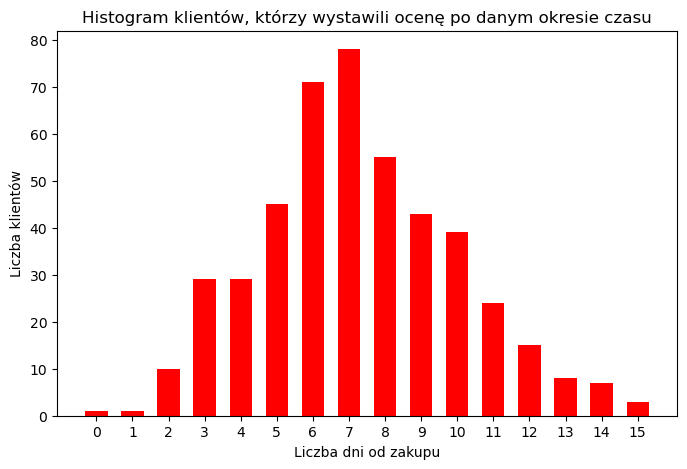

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
bins = range(17)
Wielkopolskie.hist(column='Dni od zakupu', rwidth = 0.618, color='r',bins=bins, ax=ax)
ax.set_xticks([(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])])
ax.set_xticklabels(range(16))
ax.set_title('Histogram klientów, którzy wystawili ocenę po danym okresie czasu')
ax.set_xlabel('Liczba dni od zakupu')
ax.set_ylabel('Liczba klientów')
ax.grid(False)
plt.show()

Na powyższym histogramie można zauważyć, że liczba dni od zakupu ma w przybliżeniu rozkład normalny. Najwięcej klientów decyduje się na wystawienie recenzji tydzień po zakupie. Tendencja na wykresie wskazuje, że jeśli klient tej sieci sklepów w województwie wielkopolskim nie wystawił recenzji odkurzacza w czasie 15 dni od zakupu, to z bardzo dużą pewnością można powiedzieć, że nie wystawi jej wcale.

##### **2. Liczba sprzedanych odkurzaczy w zależności od producenta**

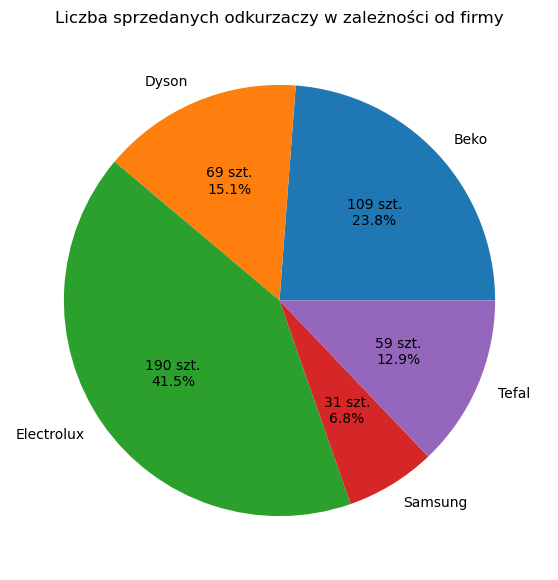

In [11]:
fig, ax = plt.subplots(figsize=(7, 7))
Df = Wielkopolskie.groupby(['Marka']).size()
Df_list = Df.to_list()

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:d} szt.\n{:.1f}%".format(absolute,pct)

Df.plot.pie(column='Marka',autopct=lambda pct: func(pct, Df_list), ax=ax)
ax.set_title('Liczba sprzedanych odkurzaczy w zależności od firmy')
ax.set_ylabel('')
ax.set
plt.show()

Powyższy wykres obrazuje, że największy udział w tej sieci sklepów w Wielkopolskim rynku sprzedanych odkurzaczy posiada firma Electrolux, zaś najmniejszy firma Samsung. Firma Beko, pomimo że jest drugim co do wielkości dystrybutorem odkurzaczy, to jej udział jest około o połowę mniejszy niż Electroluxa. Firma Tafel i Dyson posiada podobne udziały w sprzedanych odkurzaczach i stanowi on około 13-15 %.

##### **3. Rozkład wieku osób kupujących odkurzacz**

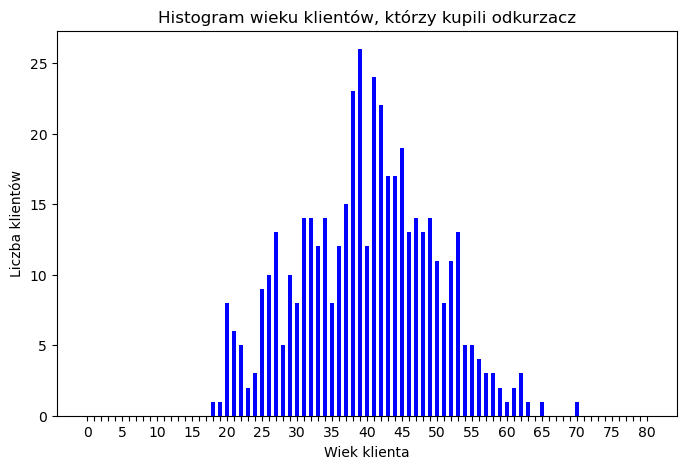

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
bins = range(82)
Wielkopolskie.hist(column='Wiek kupującego', rwidth = 0.618, color='b',bins = bins, ax=ax)
ax.set_xticks([(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])])
ax.set_xticklabels([i if i % 5 == 0 else None for i in range(81)])
ax.set_title('Histogram wieku klientów, którzy kupili odkurzacz')
ax.set_xlabel('Wiek klienta')
ax.set_ylabel('Liczba klientów')
ax.grid(False)
plt.show()

Ponownie jak w przypadku pierwszego histogramu można zauważyć, że rozkład wieku kupujących odkurzacze w rozważanej sieci sklepów w Wielkopolsce jest w przybliżeniu normalny. Najwięcej kupujących ma około 40 lat. Najmłodsi kupujący są pełnoletni, zaś najstarsi skończyli 70 lat. Na histogramie można zauważyć tendencję, że poza osobami w średnim wieku, to młodsi kupują więcej odkurzaczy niż osoby starsze, co może być wynikiem wyprowadzania się przez nich do nowego miejsca zamieszkania.

##### **4. Liczba osób kupujących odkurzacz danej marki z podziałem na płeć klienta**

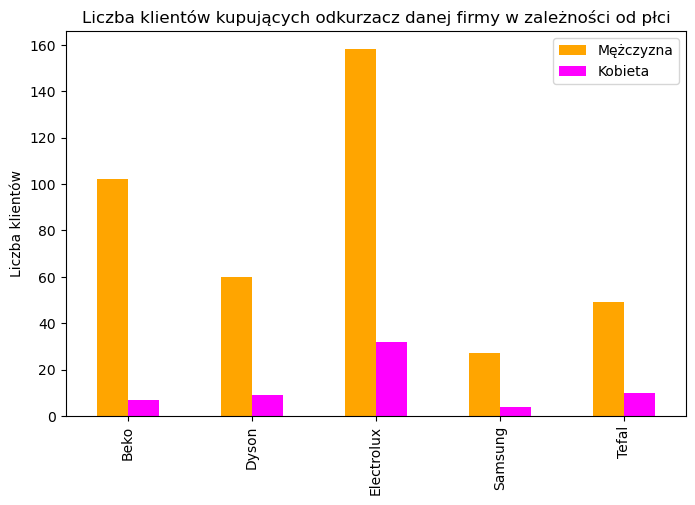

In [13]:
Df1 = Wielkopolskie.loc[Wielkopolskie['Płeć kupującego'] == 'M'].groupby(['Marka']).size()
Df2 = Wielkopolskie.loc[Wielkopolskie['Płeć kupującego'] == 'K'].groupby(['Marka']).size()
Df = pd.concat([Df1, Df2], axis=1, ignore_index=True)
fig, ax = plt.subplots(figsize=(8, 5))
Df.plot.bar(ax=ax, color=['orange','magenta'])
plt.legend(['Mężczyzna','Kobieta'])
plt.title('Liczba klientów kupujących odkurzacz danej firmy w zależności od płci')
plt.xlabel('')
plt.ylabel('Liczba klientów')
plt.show()

Na powyższym wykresie można zauważyć, że w sklepach rozważanej sieci w Wielkopolsce to panowie zdecydowanie częściej zajmują się kupnem odkurzaczy niż kobiety. Stosunek liczby panów do liczby pań decydujących się na zakup odkurzacza danej firmy jest na oko podobny dla każdej marki, z pominięciem firmy Beko gdzie bardziej dominują mężczyźni. Co ciekawe u największego dystrybutora odkurzaczy tej sieci w Wielkopolsce - Electroluxa liczba zakupionych odkurzaczy przez panie przekracza nawet liczbę odkurzaczy zakupionych przez panów dla najmniejszego dystrybutora - Samsunga.

##### **5. Średnia ocen kupujących odkurzacze w zależności od marki produktu**

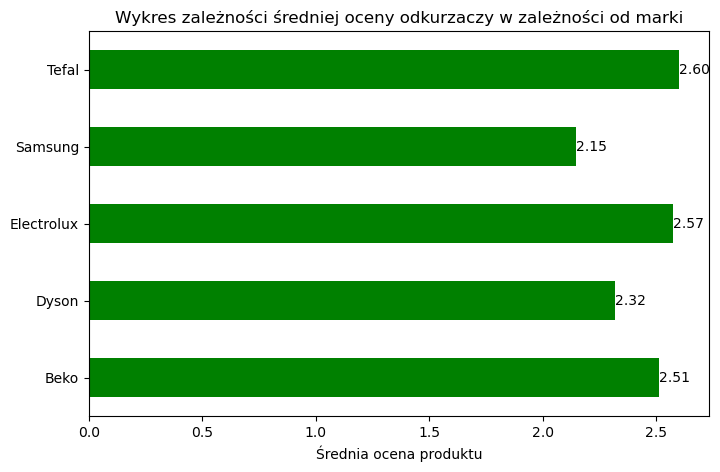

In [14]:
Df = Wielkopolskie.groupby(['Marka']).mean()['Ocena']
fig, ax = plt.subplots(figsize=(8, 5))
Df.plot.barh(ax=ax, color='g')
ax.bar_label(ax.containers[0],fmt='%.2f')
plt.title('Wykres zależności średniej oceny odkurzaczy w zależności od marki')
plt.xlabel('Średnia ocena produktu')
plt.ylabel('')
plt.show()

Na powyższym wykresie można zaobserwować, że średnia ocena odkurzaczy danej firmy w tej sieci sklepów w Wielkopolsce jest bardzo podobna i oscyluje wokół wartości 2.4 / 5. Tendencja wskazuje, że odkurzacze firmy Tafel, Electrolux oraz Beko posiadają najwyższe oceny, a firmy Samsung oraz Dyson najniższe. Można więc dopatrzyć się tutaj ewidentnej korelacji w związku z ilością odkurzaczy sprzedanych przez daną firmę w Wielkopolskich placówkach rozważanej sieci sklepów.

#### **Wnioski**
Ćwicznie pozwoliło za utrwalenie umiejętności związanych się z Tier Protocol 3.0 oraz zasadami Tidy data, a także pozwoliło stworzyć prostą analizę danego zbioru danych w oparciu o bibliotekę matplotlib oraz pandas. Wnioski z analizy danych zostały przedstawione pod każdym wykresem.